In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import nlopt
import seaborn as sns
from statsrat import perform_oat, oat_grid, make_sim_data, learn_plot
from statsrat.expr.predef.cat import ibre, lrn_pred
from statsrat.rw.predef import smpr
import statsrat.bayes_regr as br
from statsrat.rw.fbase import elem, elem_intercept
from scipy import stats

In [19]:
#m = br.model(name = 'linear', fbase = elem_intercept, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
m = br.model(name = 'multinomial probit', fbase = elem_intercept, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'multinomial probit derived attention ARD', fbase = elem_intercept, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)

#par_val = [1, 1, 5]
par_val = [1, 5]
#par_val = [-1, 10, 5]

print(m.pars)
trials = ibre.make_trials()
#trials = lrn_pred.make_trials()
ds = m.simulate(trials = trials, par_val = par_val)

             min    max  default
tausq_inv   0.01  100.0      1.0
resp_scale  0.00   10.0      1.0


In [20]:
print(ds['mean_z'].loc[{'t': ds.trial_name == 'i1.pr1 -> r1'}] - ds['z_hat'].loc[{'t': ds.trial_name == 'i1.pr1 -> r1'}])
print(ds['mean_z'].loc[{'t': ds.trial_name == 'i1.pc1 -> c1'}] - ds['z_hat'].loc[{'t': ds.trial_name == 'i1.pc1 -> c1'}])

<xarray.DataArray (t: 15, u_name: 4)>
array([[-0.73355681, -0.51257423,  0.65050732, -0.54684518],
       [-0.42349232, -0.27618336,  0.41023726, -0.28594774],
       [-0.32888964, -0.21633665,  0.32392864, -0.22189363],
       [-0.27946896, -0.18576139,  0.2769338 , -0.18987042],
       [-0.24748165, -0.16678155,  0.2459715 , -0.17054793],
       [-0.22689431, -0.15330793,  0.22585956, -0.15685147],
       [-0.21112073, -0.14333308,  0.21036802, -0.1465584 ],
       [-0.19842345, -0.13554693,  0.19785288, -0.13851323],
       [-0.1885308 , -0.12920181,  0.18807768, -0.13202181],
       [-0.18003832, -0.12392787,  0.17967075, -0.12663534],
       [-0.17301589, -0.11946864,  0.1727094 , -0.12203189],
       [-0.16684348, -0.11561021,  0.16658407, -0.11806733],
       [-0.161568  , -0.11223567,  0.16134432, -0.11461627],
       [-0.15685263, -0.10925637,  0.15665761, -0.11154769],
       [-0.15274208, -0.1065934 ,  0.1525697 , -0.10881694]])
Coordinates:
  * t           (t) int64 3 11 22

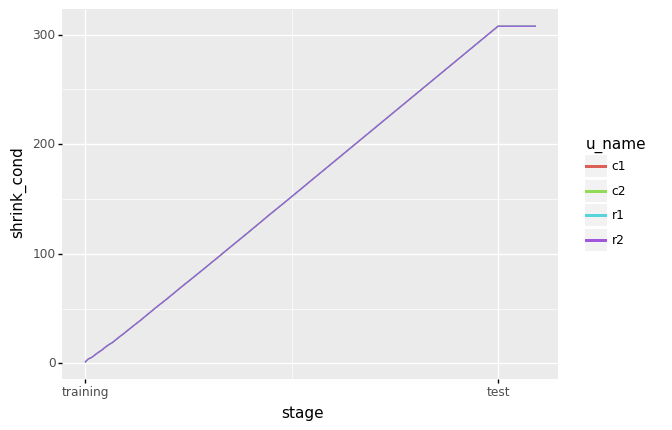

<ggplot: (305380852)>

In [18]:
var = 'shrink_cond'
#print(np.round(ds['shrink_cond'].loc[{'t': range(10)}], 0))
learn_plot(ds, var)

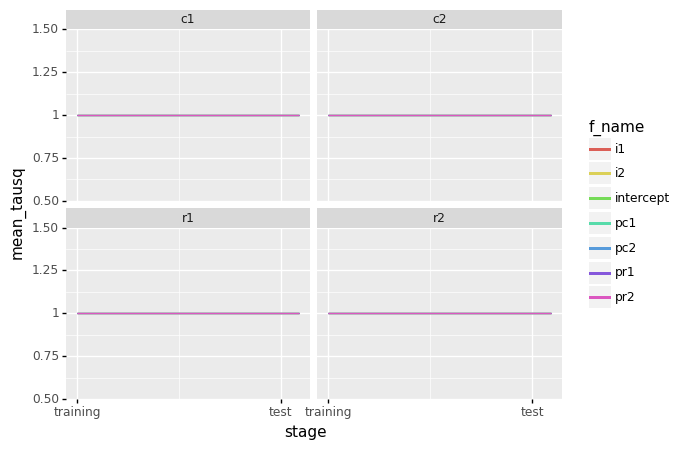

<ggplot: (304055781)>

In [5]:
#var = 'mean_tausq_inv'
var = 'mean_tausq'
learn_plot(ds, var)

In [ ]:
var = 'z_hat'
#var = 'mean_z'
index = ds.trial_name == 'i1.pr1 -> r1'
#index = ds.trial_name == 'i1.pc1 -> c1'
learn_plot(ds, var, sel = {'u_name': ['c1', 'r1'], 't': index})

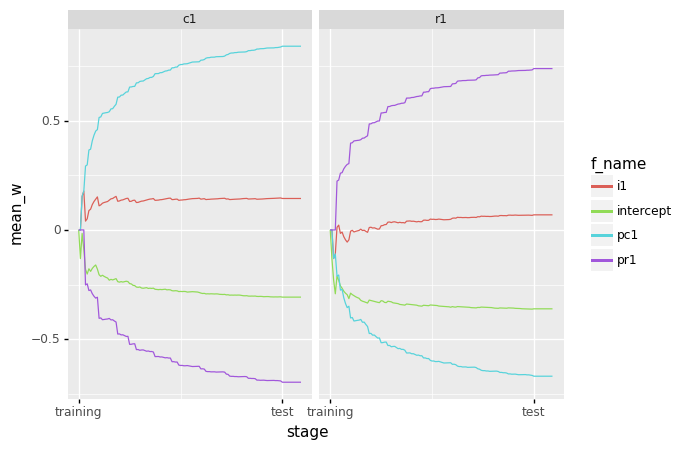

<ggplot: (305522649)>

In [21]:
var = 'mean_w'
#var = 'mean_wsq'
learn_plot(ds, var, sel = {'f_name': ['pc1', 'pr1', 'i1', 'intercept'], 'u_name': ['c1', 'r1']})

In [11]:
# ordinal adequacy test (OAT) for the IBRE

n = 20
max_time = 120
#algorithm = nlopt.GN_DIRECT_L
#algorithm = nlopt.GN_AGS
algorithm = nlopt.GN_ORIG_DIRECT
#algorithm = nlopt.GD_STOGO

#m = br.model(name = 'linear', fbase = elem_intercept, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'linear derived attention ARD', fbase = elem_intercept, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)
m = br.model(name = 'multinomial probit', fbase = elem_intercept, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'multinomial probit derived attention ARD', fbase = elem_intercept, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)

oat_result = perform_oat(m, ibre, minimize = False, n = n, max_time = max_time, algorithm = algorithm)
print(oat_result[0])
print(oat_result[1])

Maximizing OAT score.
[50.005  5.   ]
[83.33433333  5.        ]
[16.67566667  5.        ]
[94.44411111  5.        ]
[72.22455556  5.        ]
[94.44411111  5.        ]
[98.61027778  5.        ]
[99.999  5.   ]
[99.999  5.   ]
     tausq_inv      mean     lower     upper
max     99.999 -0.100509 -0.100565 -0.100454
  schedule          trial_name u_name  mean_resp
0   design  pc1.pr1 -> nothing     c1   0.334510
1   design  pc1.pr1 -> nothing     c2   0.225752
2   design  pc1.pr1 -> nothing     r1   0.234030
3   design  pc1.pr1 -> nothing     r2   0.205708
4   design  pc2.pr2 -> nothing     c1   0.225688
5   design  pc2.pr2 -> nothing     c2   0.334570
6   design  pc2.pr2 -> nothing     r1   0.205711
7   design  pc2.pr2 -> nothing     r2   0.234031


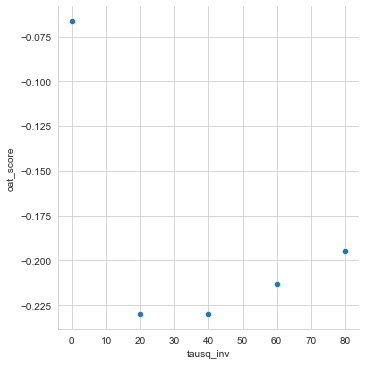

In [31]:
#m = br.model(name = 'linear', fbase = elem_intercept, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'linear derived attention ARD', fbase = elem_intercept, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)
m = br.model(name = 'multinomial probit', fbase = elem_intercept, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'multinomial probit derived attention ARD', fbase = elem_intercept, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)

free_par = 'tausq_inv'
fixed_values = {'resp_scale': 5}
#free_par = 'u_var'
#fixed_values = {'prior_tausq_inv_hpar0': -10, 'prior_tausq_inv_hpar1': 2, 'resp_scale': 5}

df = oat_grid(m,
              ibre,
              free_par = free_par,
              fixed_values = fixed_values,
              n_points = 5)
sns.set_style("whitegrid")
sns.relplot(x = free_par, y = 'oat_score', data = df)

In [23]:
# ordinal adequacy test (OAT) for learned predictiveness
n = 20
max_time = 60
#algorithm = nlopt.GN_DIRECT_L
#algorithm = nlopt.GN_AGS
algorithm = nlopt.GN_ORIG_DIRECT
#algorithm = nlopt.GD_STOGO

#m = br.model(name = 'linear', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'linear derived attention ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)
#m = br.model(name = 'multinomial probit', fbase = elem, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.constant)
m = br.model(name = 'multinomial probit derived attention ARD', fbase = elem_intercept, link = br.link.multinomial_probit, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)

oat_result = perform_oat(m, lrn_pred, n = n, max_time = max_time, algorithm = algorithm, minimize = False)
print(oat_result[0])
print(oat_result[1])

Maximizing OAT score.
[-5.  6.  5.]
[-1.66733333  6.          5.        ]
[-8.33266667  6.          5.        ]
[-5.          9.33266667  5.        ]
[-5.          2.66733333  5.        ]
[-1.66733333  6.          5.        ]
[-0.41758333  6.          5.        ]
     prior_tausq_inv_hpar0  prior_tausq_inv_hpar1      mean     lower  \
max              -0.417583                    6.0  0.061314  0.061281   

        upper  
max  0.061347  
  schedule      trial_name u_name  mean_resp
0   design  a.c -> nothing   cat3   0.696550
1   design  a.c -> nothing   cat4   0.303450
2   design  b.d -> nothing   cat3   0.303965
3   design  b.d -> nothing   cat4   0.696035
4   design  v.x -> nothing   cat3   0.635293
5   design  v.x -> nothing   cat4   0.364707
6   design  w.y -> nothing   cat3   0.365336
7   design  w.y -> nothing   cat4   0.634664
